# CNN 2D

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#dataset CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalizace
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 31s 0us/step


In [9]:
# model:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [10]:

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10


2023-06-16 11:09:48.268719: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-16 11:09:48.499445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5463 - accuracy: 0.4348

2023-06-16 11:10:03.355720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 16s 9ms/step - loss: 1.5463 - accuracy: 0.4348 - val_loss: 1.2605 - val_accuracy: 0.5497
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1803 - accuracy: 0.5799 - val_loss: 1.0862 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0357 - accuracy: 0.6330 - val_loss: 1.0052 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9422 - accuracy: 0.6692 - val_loss: 0.9431 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8707 - accuracy: 0.6945 - val_loss: 0.8867 - val_accuracy: 0.6896
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8062 - accuracy: 0.7167 - val_loss: 0.8840 - val_accuracy: 0.6957
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7660 - accuracy: 0.7326 - val_loss: 0.9780 - val_accuracy: 0.6

In [11]:
#vyhodnoceni modelu
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8529 - accuracy: 0.7157 - 1s/epoch - 4ms/step

Test accuracy: 0.7156999707221985


## příklady:

 67/313 [=====>........................] - ETA: 0s

2023-06-16 11:14:10.175171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


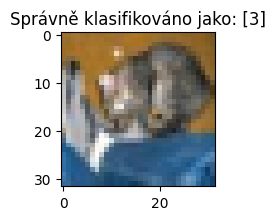

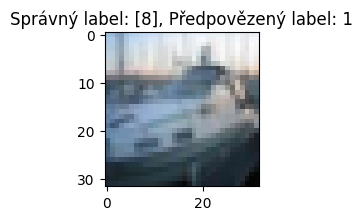

In [12]:
# priklad spravne a spatne
predictions = model.predict(test_images)
predictions = tf.argmax(predictions, axis=1)

correct_predictions = predictions.numpy() == test_labels.squeeze()
incorrect_predictions = ~correct_predictions

# spravne
plt.figure(figsize=(2,2))
plt.imshow(test_images[correct_predictions][0])
plt.title(f"Správně klasifikováno jako: {test_labels[correct_predictions][0]}")
plt.show()

# spatne
plt.figure(figsize=(2,2))
plt.imshow(test_images[incorrect_predictions][0])
plt.title(f"Správný label: {test_labels[incorrect_predictions][0]}, Předpovězený label: {predictions[incorrect_predictions][0]}")
plt.show()

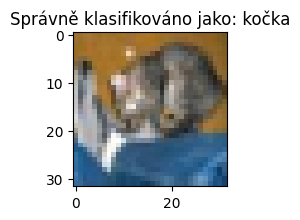

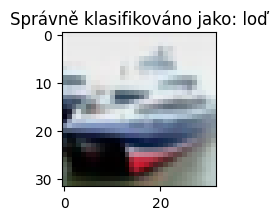

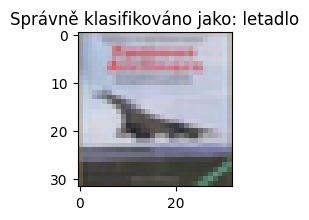

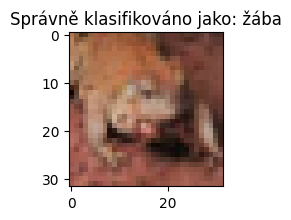

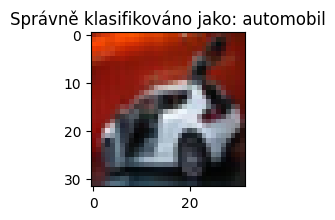

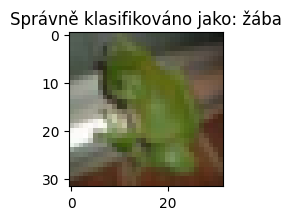

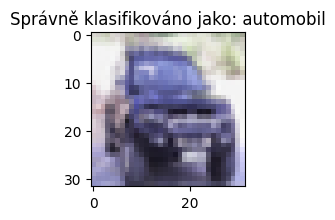

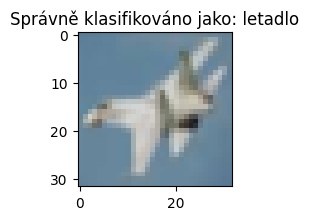

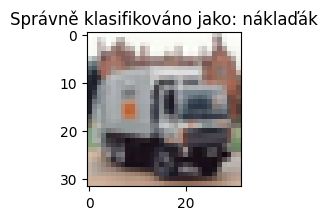

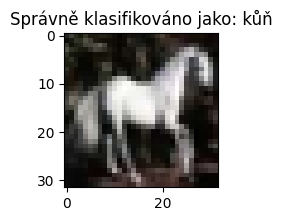

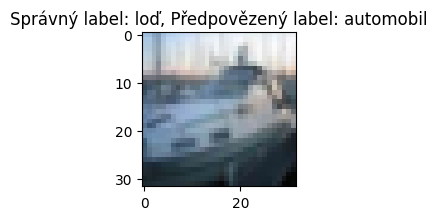

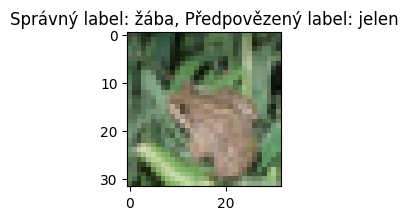

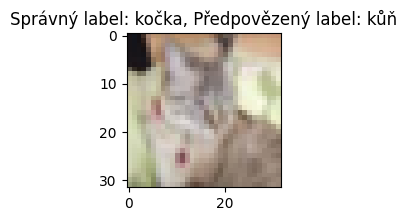

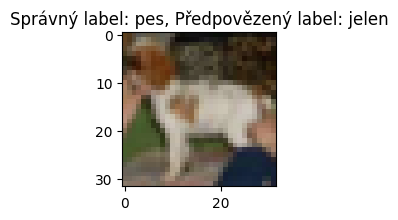

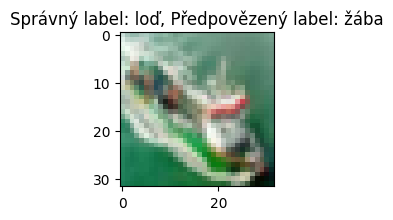

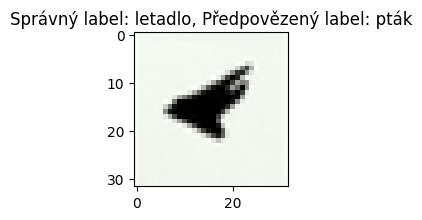

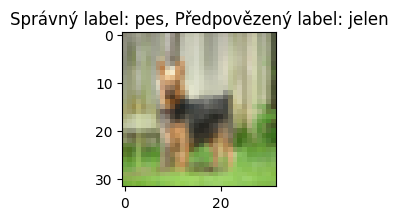

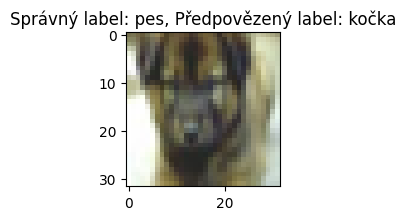

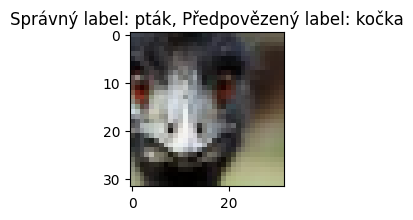

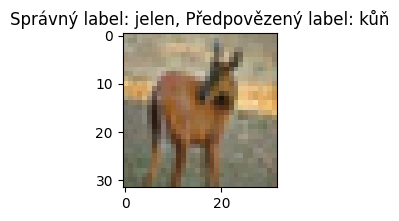

In [13]:
class_names = ['letadlo', 'automobil', 'pták', 'kočka', 'jelen',
               'pes', 'žába', 'kůň', 'loď', 'náklaďák']

# 10 dobre a 10 spatne
correct_indices = [np.where(correct_predictions)[0][i] for i in range(10)]
incorrect_indices = [np.where(incorrect_predictions)[0][i] for i in range(10)]

# spravne
for i in correct_indices:
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i])
    plt.title(f"Správně klasifikováno jako: {class_names[test_labels[i][0]]}")
    plt.show()

#spatne:
for i in incorrect_indices:
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i])
    plt.title(f"Správný label: {class_names[test_labels[i][0]]}, Předpovězený label: {class_names[predictions[i]]}")
    plt.show()